In [2]:
'''
This script evaluates the correlation between protein data and gene expression datasets 
used for the creation of A375-specific models.
'''

'\nThis script evaluates the correlation between protein data and gene expression datasets \nused for the creation of A375-specific models.\n'

In [3]:
# imports
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [4]:
current_dir = Path.cwd()
data_dir = current_dir.parent / "datasets"

In [8]:
# load gene expression & protein measurement datasets
expr_data = pd.read_csv(data_dir / "ftINIT" / "prepared_datasets" / "A375_expression_data.txt", delimiter="\t", index_col="Name")[["TPM"]].rename(columns={"TPM": "Gene Expression [TPM]"})
prot_data = pd.read_csv(data_dir / "A735_protein_data_prep.tsv", delimiter="\t", index_col="Gene ID")[["Protein Concentration"]].rename(columns={"Protein Concentration": "Protein Concentration [mmol/gDW]"})
print(expr_data)
print(prot_data)

                 Gene Expression [TPM]
Name                                  
ENSG00000128274                  10.89
ENSG00000118017                   0.34
ENSG00000094914                  78.09
ENSG00000081760                  12.54
ENSG00000114771                   0.00
...                                ...
ENSG00000084073                 140.27
ENSG00000066379                  11.19
ENSG00000186187                   6.04
ENSG00000180233                   4.21
ENSG00000163012                   0.00

[2886 rows x 1 columns]
                 Protein Concentration [mmol/gDW]
Gene ID                                          
ENSG00000110435                      8.786247e-06
ENSG00000130957                      4.277368e-06
ENSG00000105679                      2.261984e-06
ENSG00000101365                      7.776139e-06
ENSG00000062485                      2.204465e-05
...                                           ...
ENSG00000152254                      1.795760e-04
ENSG00000131069   

In [9]:
# joining datasets based on Ensembl IDs
combined_data = prot_data.join(expr_data, how="left")
print(combined_data)

                 Protein Concentration [mmol/gDW]  Gene Expression [TPM]
Gene ID                                                                 
ENSG00000110435                      8.786247e-06                  67.62
ENSG00000130957                      4.277368e-06                   2.85
ENSG00000105679                      2.261984e-06                   0.00
ENSG00000101365                      7.776139e-06                 216.26
ENSG00000062485                      2.204465e-05                 157.95
...                                           ...                    ...
ENSG00000152254                      1.795760e-04                   0.00
ENSG00000131069                      2.758456e-06                  38.30
ENSG00000154930                      1.149030e-05                  12.54
ENSG00000136143                      1.254821e-05                  63.75
ENSG00000023697                      7.053881e-07                  45.84

[79 rows x 2 columns]


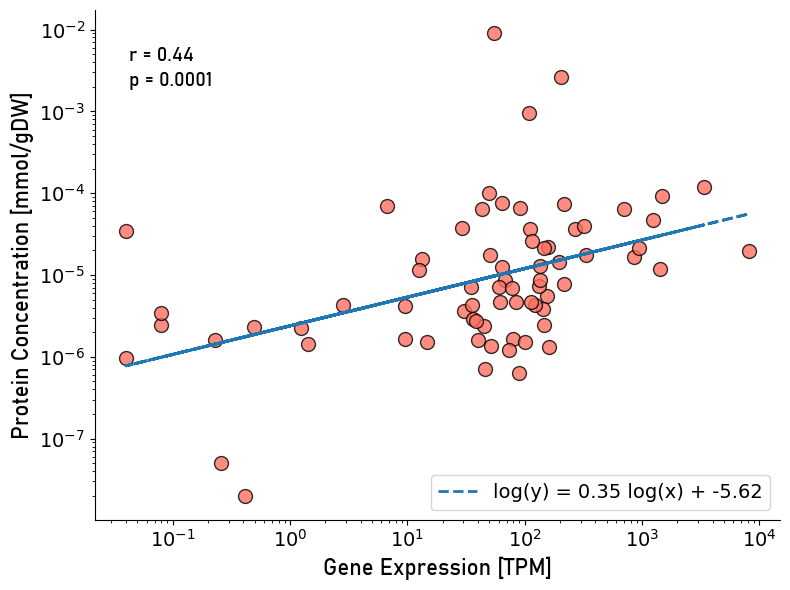

Pearson correlation coefficient (r): 0.44
P-value: 0.0001
n = 72
Data left out of the correlation because of 0 values:
                 Protein Concentration [mmol/gDW]  Gene Expression [TPM]
Gene ID                                                                 
ENSG00000105679                      2.261984e-06                   0.00
ENSG00000102144                      0.000000e+00                 646.45
ENSG00000170950                      1.746387e-06                   0.00
ENSG00000163581                      4.283439e-06                   0.00
ENSG00000164708                      4.644377e-06                   0.00
ENSG00000197241                      3.320682e-07                   0.00
ENSG00000152254                      1.795760e-04                   0.00


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Log-transform the data (excluding zero values to avoid log issues)
valid_data = (combined_data["Gene Expression [TPM]"] > 0) & (combined_data["Protein Concentration [mmol/gDW]"] > 0)
x = combined_data.loc[valid_data, "Gene Expression [TPM]"]
y = combined_data.loc[valid_data, "Protein Concentration [mmol/gDW]"]


log_x = np.log10(x)
log_y = np.log10(y)

# Perform linear regression on log-transformed data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Convert regression line back to original scale
regression_line = 10**(slope * np.log10(x) + intercept)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot
ax.scatter(x, y, color="#FF6F61", edgecolor="black", s=100, alpha=0.8)

# Regression line (corrected for log-log scale)
ax.plot(x, regression_line, color="#1f77b4", linestyle="--", linewidth=2, 
        label=f"log(y) = {slope:.2f} log(x) + {intercept:.2f}")

# Correlation coefficient text
ax.text(0.05, 0.9, f"r = {r_value:.2f}", transform=ax.transAxes, fontsize=14, fontname="Bahnschrift", color="black")
ax.text(0.05, 0.85, f"p = {p_value:.4f}", transform=ax.transAxes, fontsize=14, fontname="Bahnschrift", color="black")

# Labels and styling
ax.set_xlabel("Gene Expression [TPM]", fontsize=16, fontname="Bahnschrift")
ax.set_ylabel("Protein Concentration [mmol/gDW]", fontsize=16, fontname="Bahnschrift")
ax.tick_params(axis='both', labelsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_yscale("log")
ax.set_xscale("log")

# Legend
ax.legend(fontsize=14, loc="lower right")

# Layout and show plot
plt.tight_layout()
plt.savefig(current_dir.parent / "outputs" / "scatter_correlation_protein_rna_loglog.svg")
plt.show()

# Print Pearson correlation coefficient
print(f"Pearson correlation coefficient (r): {r_value:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"n = {len(log_x)}")
# Print data that was left out because of 0 values
print("Data left out of the correlation because of 0 values:")
print(combined_data.loc[~valid_data])
